# Gradient Descent For Temperatures

## This script contains the following:

1. Importing Libraries and Files
2. Creating Subset of Data
3. Mean Temperature of Madrid in 2020
4. Mean Temperature of Budapest in 2018
5. Mean Temperature of Heathrow in 2021
6. Temperature over 60 years

## 01. Importing Libraries and Files

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

In [2]:
# Creating a Path
path = r'/Users/niravbariya/Documents/Data Science/CareerFoundry/Machine Learning Specialization/Achievement 1/02 Data Sets'

In [3]:
# Reading the File
climate = pd.read_csv(os.path.join(path, 'Prepared Data', 'weather_scaled.csv'))
climate

BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  BASEL_pressure  \
0               0.660514          -0.02793        0.826097       -0.001949   
1               0.244897          -0.02793        0.735760       -0.001949   
2               1.076130          -0.02793        1.277781       -0.001949   
3              -1.001953          -0.02793        1.458455       -0.001949   
4               0.244897          -0.02793        1.729466       -0.001949   
...                  ...               ...             ...             ...   
22945          -1.833187          -0.02793        0.284075        1.037367   
22946           0.244897          -0.02793        0.103401        0.976231   
22947          -0.586336          -0.02793        0.013064        0.716402   
22948          -0.170720          -0.02793        0.374412        0.487141   
22949          -0.170720          -0.02793        0.735760        0.196744   

       BASEL_global_radiation  BASEL_precipitation  BASEL_snow_depth  \
0                   -1.101066            -0.265148         -0.179228   
1                   -1.058108             1.658760         -0.179228   
2                   -1.251420             0.155707         -0.179228   
3                   -0.821838            -0.445514         -0.179228   
4                   -0.746661            -0.164944         -0.179228   
...                       ...                  ...               ...   
22945               -0.005632            -0.004619         -0.179228   
22946               -0.005632            -0.004619         -0.179228   
22947               -0.005632            -0.004619         -0.179228   
22948               -0.005632            -0.004619         -0.179228   
22949               -0.005632            -0.004619         -0.179228   

       BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  ...  \
0           -0.902918        -0.528623       -0.845652  ...   
1           -0.810126        -0.582946       -0.462450  ...   
2           -1.065304        -0.257010       -0.186545  ...   
3           -0.114186        -0.555784       -0.385810  ...   
4            0.187388        -1.003946       -1.075573  ...   
...               ...              ...             ...  ...   
22945        0.720943         0.747959        0.779123  ...   
22946        0.187388         0.856604        1.223637  ...   
22947        0.349774         0.856604        1.039701  ...   
22948        0.280180         0.680055        0.809780  ...   
22949       -0.322968         0.422023        0.549202  ...   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
0              -1.299744                  -0.806427               -0.088407   
1              -1.262455                  -1.042055                0.503361   
2              -0.432779                  -1.136306               -0.396127   
3               0.387574                  -1.183432                0.669056   
4               1.729970                  -0.794645               -0.490810   
...                  ...                        ...                     ...   
22945          -0.003958                  -0.005290               -0.005560   
22946          -0.003958                  -0.005290               -0.005560   
22947          -0.003958                  -0.005290               -0.005560   
22948          -0.003958                  -0.005290               -0.005560   
22949          -0.003958                  -0.005290               -0.005560   

       VALENTIA_snow_depth  VALENTIA_sunshine  VALENTIA_temp_mean  \
0                -0.024706           0.372147           -0.668215   
1                -0.024706          -0.829285           -0.548046   
2                -0.024706          -1.009500           -0.067372   
3                -0.024706          -1.039536           -0.998679   
4                -0.024706           0.672505           -1.509396   
...                    ...                ...                 ...   
22945           

## 02. Creating Subset of Data

In [4]:
# Creating a subset of just the mean temperatures
df = climate[['date', 'month','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [5]:
df

date  month  BASEL_temp_mean  BELGRADE_temp_mean  \
0      19600101      1        -0.528623           -1.016876   
1      19600102      1        -0.582946           -1.107669   
2      19600103      1        -0.257010           -1.084971   
3      19600104      1        -0.555784           -1.209812   
4      19600105      1        -1.003946           -1.209812   
...         ...    ...              ...                 ...   
22945  20221027     10         0.747959            0.628750   
22946  20221028     10         0.856604            0.367720   
22947  20221029     10         0.856604            0.083991   
22948  20221030     10         0.680055            0.265577   
22949  20221031     10         0.422023            0.197483   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
0               -1.099163         -0.114356             -0.105836   
1               -1.110927         -0.367511             -0.370915   
2               -1.063873         -0.509912             -0.532908   
3               -1.146217         -0.525734             -0.577088   
4               -1.087400         -0.320045             -0.444548   
...                   ...               ...                   ...   
22945           -0.005167          0.898267              1.042841   
22946           -0.005167          0.945734              1.278467   
22947           -0.005167          0.914089              1.101748   
22948           -0.005167          0.692578              0.880848   
22949           -0.005167          0.439422              0.659949   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
0             -0.927601           -0.106469         -0.182904   
1             -0.825294           -0.892676         -0.212437   
2             -0.940389           -0.490837         -0.389635   
3             -1.042696           -0.316124         -0.493001   
4             -0.978754           -0.403481         -0.552067   
...                 ...                 ...               ...   
22945          0.440753            0.906865         -0.005705   
22946          0.466330            0.802037         -0.005705   
22947          0.786039            0.924336         -0.005705   
22948          0.376811            0.697210         -0.005705   
22949          0.159409            0.435140         -0.005705   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
0                -1.370824             -0.097084         -0.988280   
1                -1.043881             -0.232112         -0.691740   
2                -0.741156             -0.487164         -0.853490   
3                -0.910682             -0.472161         -0.624345   
4                -0.862246             -0.307127         -0.381721   
...                    ...                   ...               ...   
22945             0.481853              1.268193          0.683127   
22946             0.263891              1.313202          0.561815   
22947             0.300218              1.208181          0.548336   
22948             0.397090              0.923123          0.103526   
22949             0.348654              0.773092         -0.112140   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
0               -0.265742       -0.186575       -1.280450   
1               -0.353714       -0.368598       -0.539569   
2               -0.403983       -0.550620       -0.876333   
3               -0.642763       -0.417137       -0.775304   
4               -0.906678       -0.332193       -0.926848   
...                   ...             ...             ...   
22945            0.664244        0.395898       -0.000746   
22946            0.890456        0.541516       -0.000746   
22947            1.053832        0.395898       -0.000746   
22948            0.689378       -0.065226       -0.000746   
22949            0.488300        0.335224       -0.000746   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
0 

In [6]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notemp = df.drop(['date','month'], axis=1)

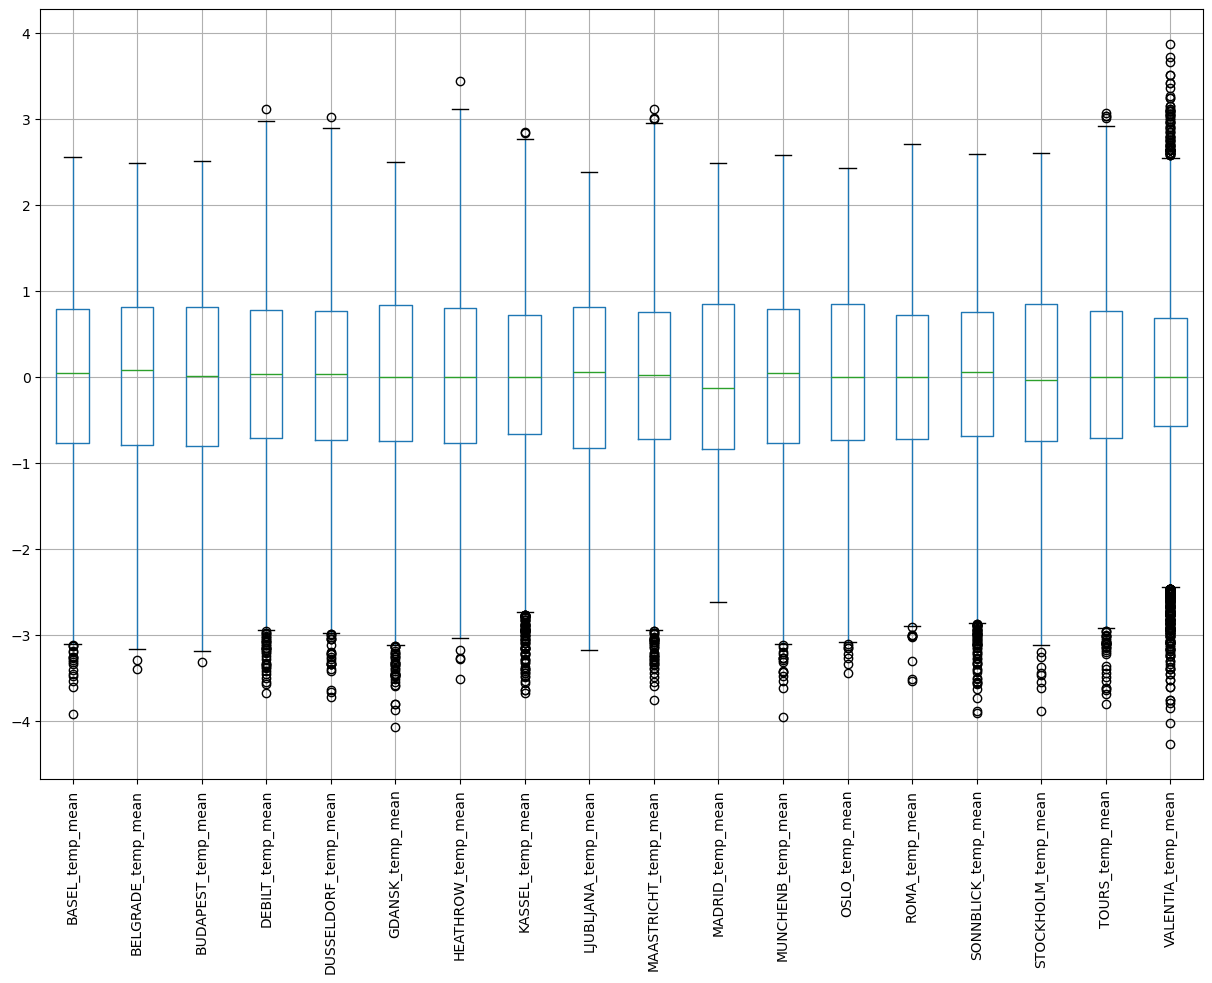

In [59]:
#Look at a whisker plot of the data to see variations in temperatures
notemp.boxplot(figsize=(15,10))
plt.xticks(rotation=90)
plt.show()

### Reducing the data to only one year

In [8]:
df['date'] = pd.to_datetime(df['date'], format = '%Y%m%d')

In [9]:
dfyear = df[df['date'].dt.year ==2020]
dfyear.head()

date  month  BASEL_temp_mean  BELGRADE_temp_mean  \
21915 2020-01-01      1        -1.465688           -1.209812   
21916 2020-01-02      1        -1.397785           -1.141717   
21917 2020-01-03      1        -0.691591           -1.357351   
21918 2020-01-04      1        -0.596526           -1.504889   
21919 2020-01-05      1        -1.180494           -1.050924   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
21915           -0.934476         -1.459245             -1.387053   
21916           -1.169744         -0.968756             -1.225060   
21917           -1.569699         -0.383334             -0.444548   
21918           -1.063873         -0.525734             -0.827441   
21919           -1.040346         -0.494089             -0.635995   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
21915         -0.735776           -1.102331         -0.005705   
21916         -0.953178           -0.595665         -0.005705   
21917         -0.799717           -0.386009         -0.005705   
21918         -0.556739           -0.980032         -0.005705   
21919         -0.722987           -0.648078         -0.005705   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
21915            -1.370824             -1.612392         -1.123071   
21916            -1.625113             -0.997267         -1.203946   
21917            -1.419260             -0.397145         -1.500486   
21918            -1.104426             -0.772222         -1.069155   
21919            -1.225516             -0.637194         -1.176988   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
21915           -1.032352       -0.550620       -0.000746   
21916           -1.321402       -0.283654       -0.000746   
21917           -0.693033       -0.235114       -0.000746   
21918           -0.592494       -0.696239       -0.000746   
21919           -0.818707       -0.793317       -0.000746   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
21915            -0.153581            -0.478156        -0.869139   
21916            -0.051205            -0.192023        -0.414197   
21917             0.007295            -0.241785        -0.288696   
21918            -0.694709            -0.615003        -0.978952   
21919            -1.382089            -0.901136        -0.822076   

       VALENTIA_temp_mean  
21915           -0.007287  
21916           -0.007287  
21917           -0.007287  
21918           -0.007287  
21919           -0.007287

In [10]:
dfyear.describe()

date       month  BASEL_temp_mean  BELGRADE_temp_mean  \
count                  366  366.000000       366.000000          366.000000   
mean   2020-07-01 12:00:00    6.513661         0.236087            0.191498   
min    2020-01-01 00:00:00    1.000000        -1.682979           -1.629730   
25%    2020-04-01 06:00:00    4.000000        -0.552389           -0.560073   
50%    2020-07-01 12:00:00    7.000000         0.238684            0.237205   
75%    2020-09-30 18:00:00    9.750000         0.978830            0.986248   
max    2020-12-31 00:00:00   12.000000         2.309734            1.945251   
std                    NaN    3.455958         0.934854            0.915643   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          366.000000        366.000000            366.000000   
mean             0.172345          0.263519              0.226841   
min             -1.581463         -1.490890             -1.607952   
25%             -0.590396         -0.430800             -0.503455   
50%              0.177166          0.233733              0.173970   
75%              0.947669          0.898267              0.851395   
max              1.935795          2.686179              2.500777   
std              0.923699          0.880960              0.905961   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        366.000000          366.000000      3.660000e+02   
mean           0.246097            0.241620     -5.705221e-03   
min           -1.336828           -2.115665     -5.705221e-03   
25%           -0.425658           -0.508308     -5.705221e-03   
50%            0.140227            0.103186     -5.705221e-03   
75%            0.949090            1.029164     -5.705221e-03   
max            2.039297            3.038360     -5.705221e-03   
std            0.815164            0.974223      4.777020e-17   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           366.000000            366.000000        366.000000   
mean              0.170559              0.279836          0.145252   
min              -1.625113             -1.732417         -1.635277   
25%              -0.644284             -0.427152         -0.637824   
50%               0.209401              0.232983         -0.091921   
75%               0.923832              0.949378          0.996516   
max               1.934934              2.783501          2.327576   
std               0.916080              0.913584          1.003402   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          366.000000      366.000000    3.660000e+02   
mean             0.250035        0.275909   -7.461638e-04   
min             -1.434508       -1.290846   -7.461638e-04   
25%             -0.476246       -0.356463   -7.461638e-04   
50%              0.293506        0.110729   -7.461638e-04   
75%              0.953293        0.866124   -7.461638e-04   
max              2.147194        2.203991   -7.461638e-04   
std              0.875189        0.783143    4.451314e-18   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           366.000000           366.000000       366.000000   
mean              0.256961             0.295811         0.319435   
min              -2.113343            -1.075304        -1.543707   
25%              -0.292519            -0.328869        -0.414197   
50%               0.248609             0.112771         0.323121   
75%               0.914051             0.949400         0.966314   
max               2.230310             2.159246         2.660579   
std               0.888164             0.788996         0.922377   

       VALENTIA_temp_mean  
count        3.660000e+02  
mean        -7.287352e-03  
min         -7.287352e-03  
25%         -7.287352e-03  
50%         -7.287352e-03  
75%         -7.287352e-03  
max         -7.287352e-03  
std          4.603310e-17

In [11]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear = dfyear.drop(['date','month'], axis=1)

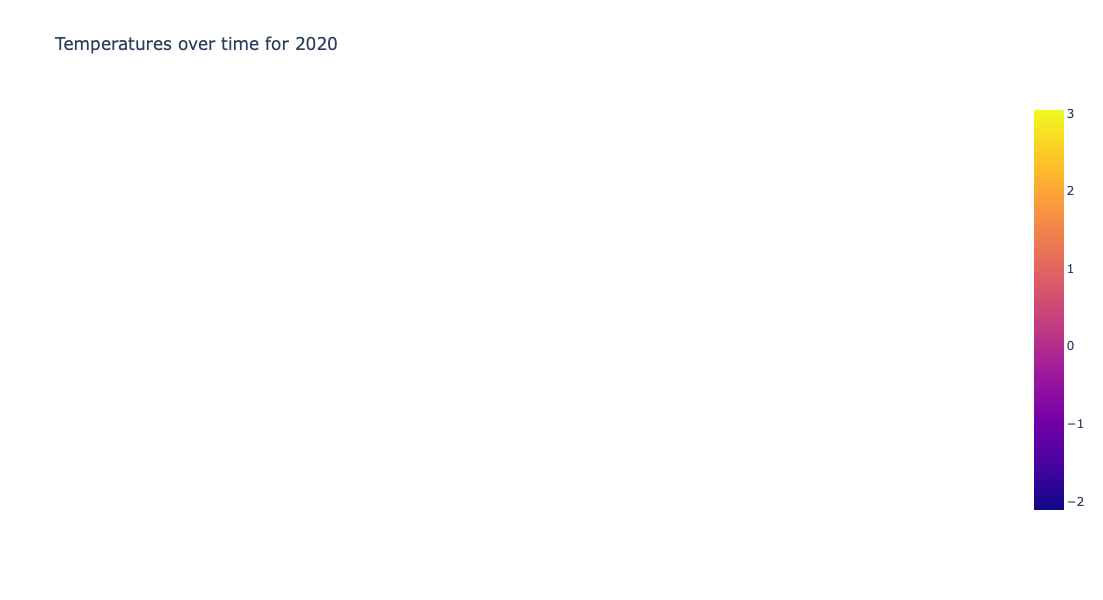

In [12]:
#Plot ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

fig = go.Figure(data=[go.Surface(z=notempyear.values)])
fig.update_layout(title='Temperatures over time for 2020', autosize=False,
                  width=600, height=600)
fig.show()

## 03. Mean Temperature of Madrid in 2020

In [13]:
#We need to make an index for the year.
#We'll scale this by 100 as the index is made. 
i = np.arange(0.01,3.67,0.01) 
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
361   3.62
362   3.63
363   3.64
364   3.65
365   3.66

[366 rows x 1 columns]

In [14]:
n_rows = dfyear.shape[0]
n_rows

366

In [15]:
#This will translate the chosen weather data into the X and y datasets needed for the optimization function.
X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['MADRID_temp_mean'].to_numpy().reshape(n_rows,1) 

In [16]:
X.shape, y.shape

((366, 2), (366, 1))

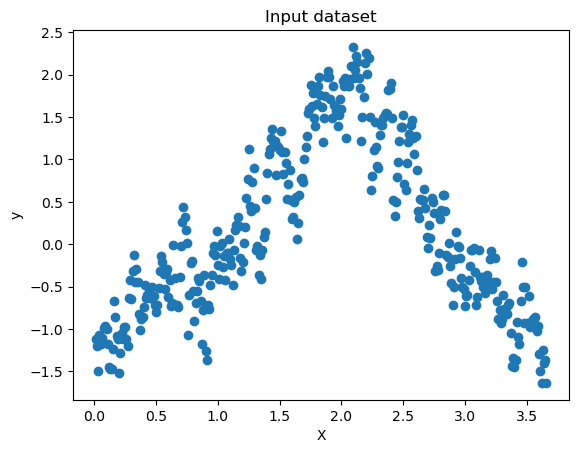

In [17]:
# Temperature data over time
plt.scatter(x=index['index'], y=dfyear['MADRID_temp_mean']) 
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [18]:
#what is the min temperature? 
dfyear['MADRID_temp_mean'].min()

-1.635276729766446

In [19]:
#what is the max temperature? 
dfyear['MADRID_temp_mean'].max()

2.3275757097137153

In [20]:
#This computes the loss function for the gradiant descent.
def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [21]:
compute_cost(X,y)

array([0.5125818])

In [22]:
#This is the gradiant descent function.

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [23]:
%%time
# Iterating gradient descent for inital values of theata0 and theta1 with specific num_iterations.

num_iterations=500 
theta_init=np.array([[1],[-1]]) # Random guess for [theta0], [theta1].
alpha=0.1 #<---step size or learning rate.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 181 ms, sys: 2.12 ms, total: 183 ms
Wall time: 185 ms


In [24]:
theta

array([[-0.07344918],
       [ 0.11918668]])

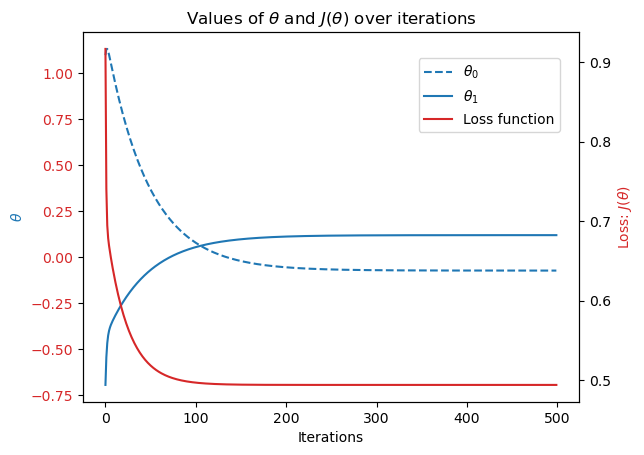

In [25]:
#This will plot loss, theta0, and theta1.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend(loc='upper center', bbox_to_anchor=(0.76, 0.84));
plt.show()

In [26]:
%%time
# Choosing theta range
theta0_vals = np.linspace(-2,2,100) 
theta1_vals = np.linspace(-4,4,100) 
                                    
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

#compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 1.15 s, sys: 19.3 ms, total: 1.17 s
Wall time: 1.17 s


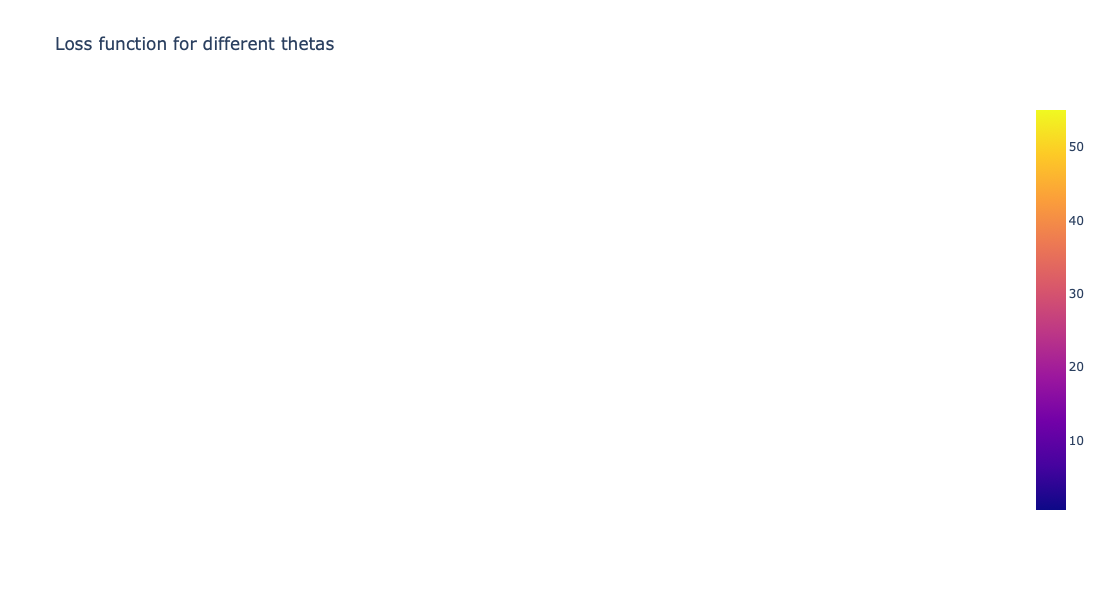

In [27]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss

fig = go.Figure(data=[go.Surface(x=theta0_vals, y=theta1_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

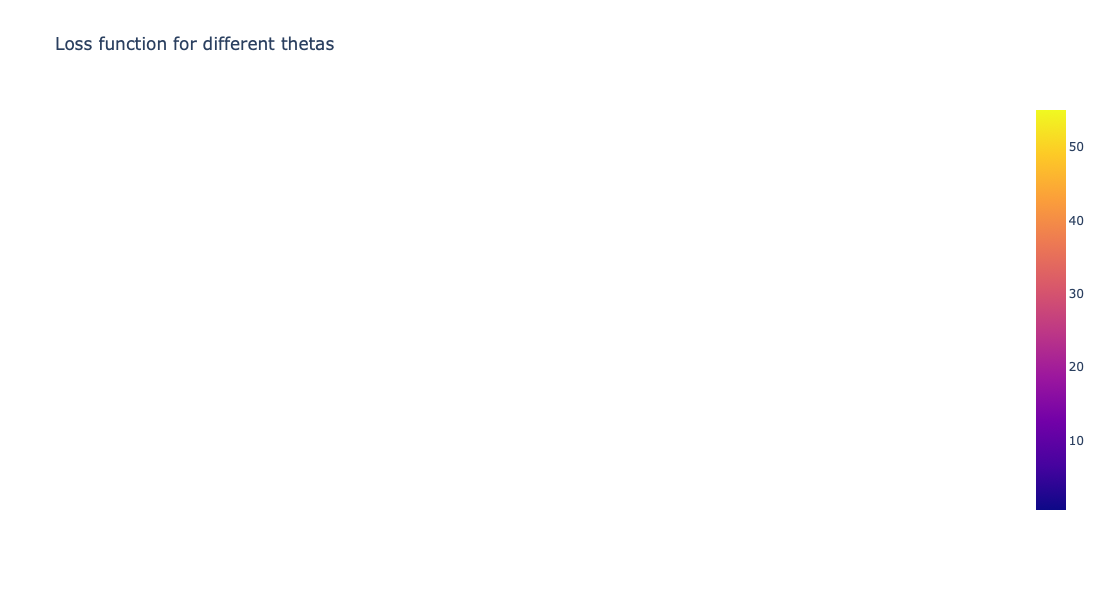

In [28]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.
#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Finding where it is closest to 0 in X and Y.

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta0_vals, y=theta1_vals, z=J_vals)
fig.add_scatter3d(x=theta0_history, y=theta1_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

The loss function is closest to zero when **theta0 = -0.07344918** and **theta1 = 0.1191867**.

In [29]:
#Rerunning the optimization above, but this time starting closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations = 500 
theta_init = np.array([[0.1191867],[-0.07344918]]) #<---making a guess as to a more accurate [x],[y] coordinates.
alpha= 0.1 
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

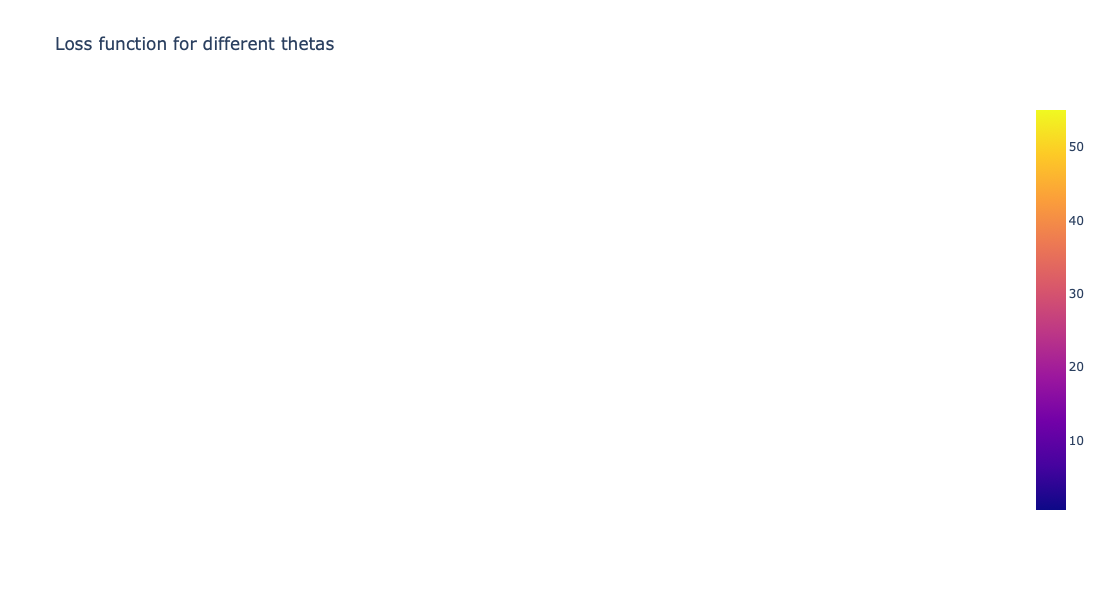

In [30]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')

#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                  yaxis_title='theta1')
fig.show()

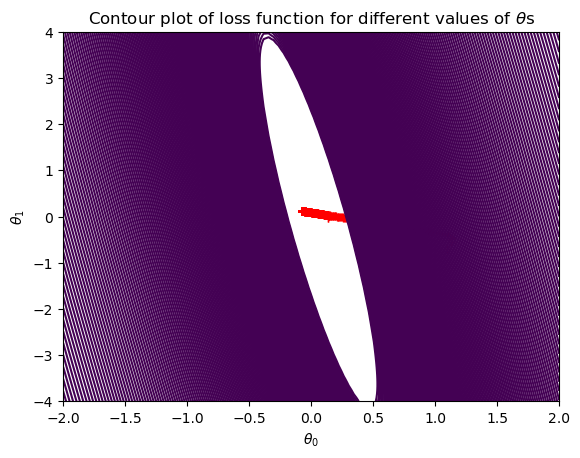

In [31]:
#This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)
plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');
plt.show()

## 04. Mean Temperature of Budapest in 2018

In [32]:
dfyear = df[df['date'].dt.year == 2018]
dfyear.head()

date  month  BASEL_temp_mean  BELGRADE_temp_mean  \
21185 2018-01-01      1        -0.365655           -0.619656   
21186 2018-01-02      1        -0.610107           -0.596958   
21187 2018-01-03      1        -0.161945           -0.767195   
21188 2018-01-04      1        -0.053300           -0.551561   
21189 2018-01-05      1        -0.148365           -0.199738   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
21185           -0.922712         -0.509912             -0.562362   
21186           -0.746261         -0.557378             -0.709628   
21187           -0.793315         -0.193467             -0.400369   
21188           -0.463939         -0.288400             -0.341462   
21189           -0.499230         -0.573200             -0.385642   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
21185         -0.134723           -0.787848         -0.005705   
21186         -0.825294           -0.578193         -0.005705   
21187         -0.659045           -0.525779         -0.005705   
21188         -0.467220           -0.298653         -0.005705   
21189         -0.326548           -0.700492         -0.005705   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
21185            -0.729047             -0.622191         -0.988280   
21186            -1.055990             -0.592185         -0.610866   
21187            -0.862246             -0.247115         -0.583908   
21188            -1.068099             -0.277121         -0.556950   
21189            -0.450540             -0.382142         -0.853490   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
21185           -0.353714       -0.550620       -0.000746   
21186           -0.579927       -0.769048       -0.000746   
21187           -0.454253       -0.890396       -0.000746   
21188           -0.278310       -0.659834       -0.000746   
21189            0.086144       -0.926801       -0.000746   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
21185            -0.431457            -0.391072        -0.508323   
21186            -1.104212            -0.440834        -0.241633   
21187            -0.987211            -0.503037         0.025056   
21188            -0.650834            -0.577681        -0.006319   
21189            -0.124331            -0.751849        -0.304384   

       VALENTIA_temp_mean  
21185           -0.007287  
21186           -0.007287  
21187           -0.007287  
21188           -0.007287  
21189           -0.007287

In [33]:
#We need to make an index for the year with 365 days. 
i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [34]:
n_rows = dfyear.shape[0]
n_rows

365

In [35]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.
X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['BUDAPEST_temp_mean'].to_numpy().reshape(n_rows,1)

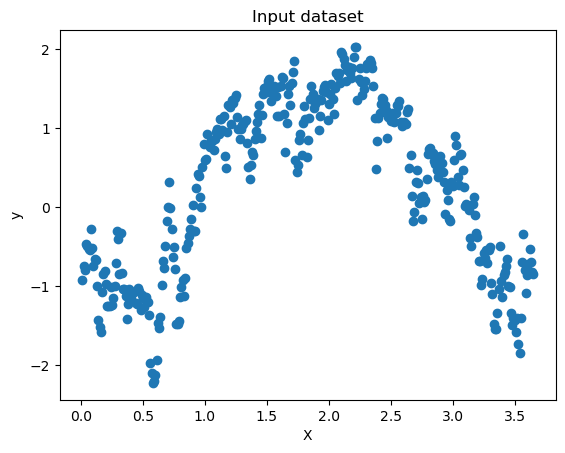

In [36]:
# Temperature data over time
plt.scatter(x=index['index'], y=dfyear['BUDAPEST_temp_mean']) 
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [37]:
%%time
#Running the data through a gradiant descent for the starting conditions in 'theta_init.'

num_iterations=200 #<---Iterations
theta_init=np.array([[1],[0]]) #<---guess for [theta0], [theta1].
alpha=0.1 #<---Step_size

theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 81.9 ms, sys: 1.92 ms, total: 83.8 ms
Wall time: 84.6 ms


In [38]:
theta

array([[-0.05990755],
       [ 0.17080952]])

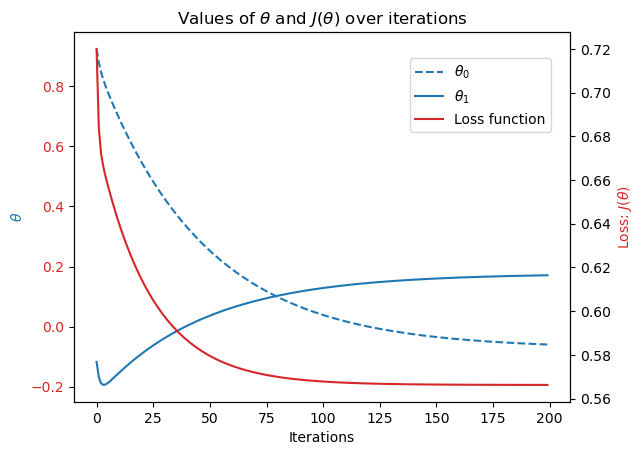

In [39]:
#This will plot your loss, theta0, and theta1. 
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()
# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend(loc='upper center', bbox_to_anchor=(0.76, 0.84));
plt.show()

In [40]:
%%time
# theta range
theta0_vals = np.linspace(-2,2,100) 
theta1_vals = np.linspace(-3,3,100) 
                                      
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 1.16 s, sys: 46.2 ms, total: 1.2 s
Wall time: 1.18 s


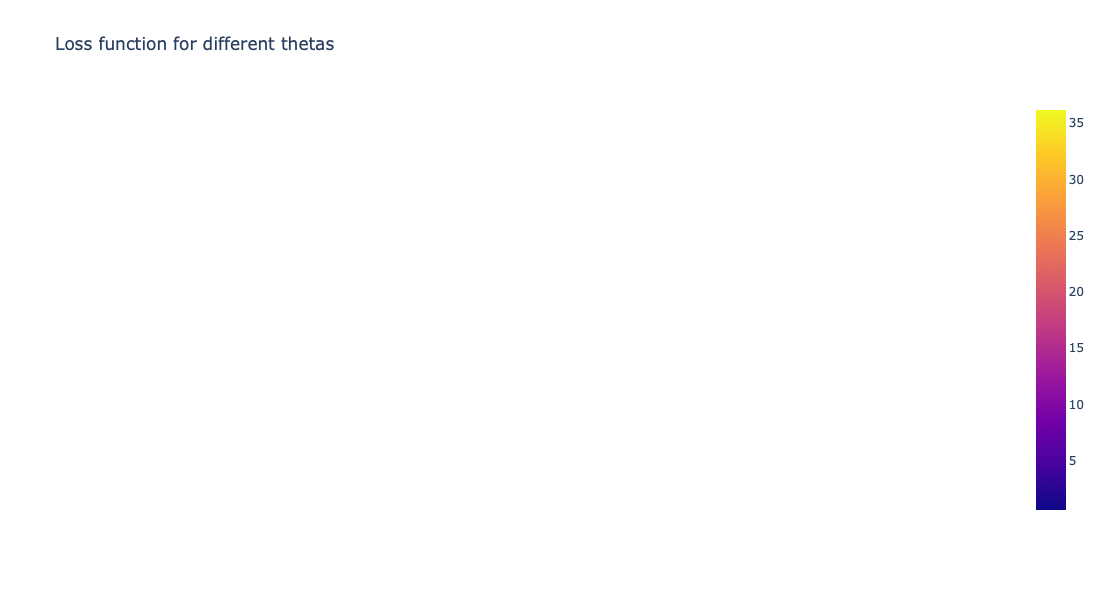

In [41]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss

fig = go.Figure(data=[go.Surface(x=theta0_vals, y=theta1_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

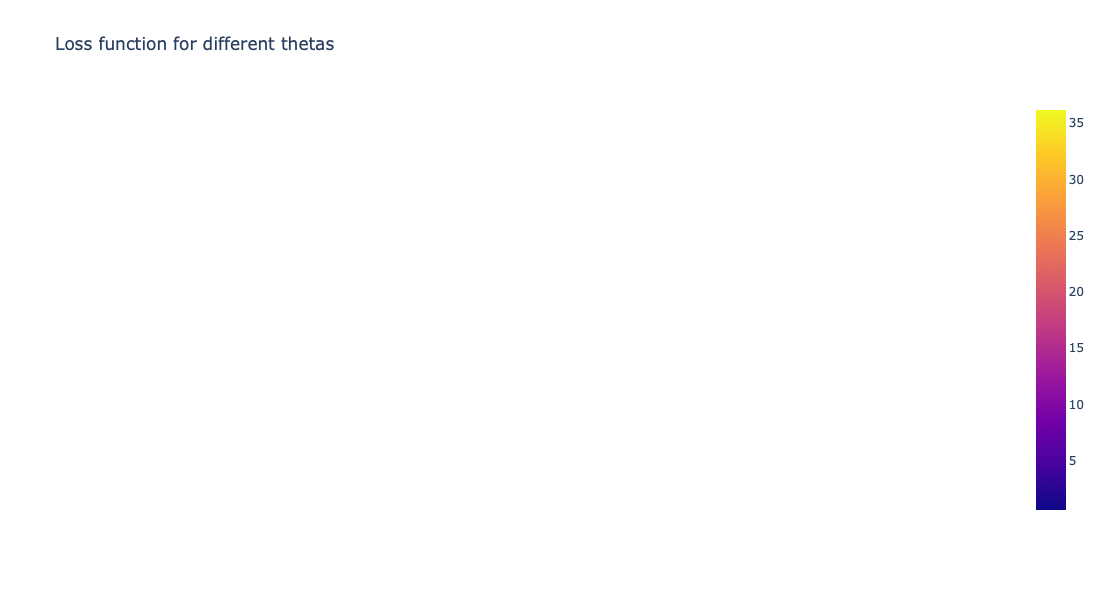

In [42]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.
#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta0_vals, y=theta1_vals, z=J_vals)
fig.add_scatter3d(x=theta0_history, y=theta1_history, z=J_history, line=line_marker, name='')

#The below line adds a graph of just the loss over iterations in a 2D plane

plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

The loss function is closest to zero when **theta0 = -0.05990** and **theta1 = 0.17080**.

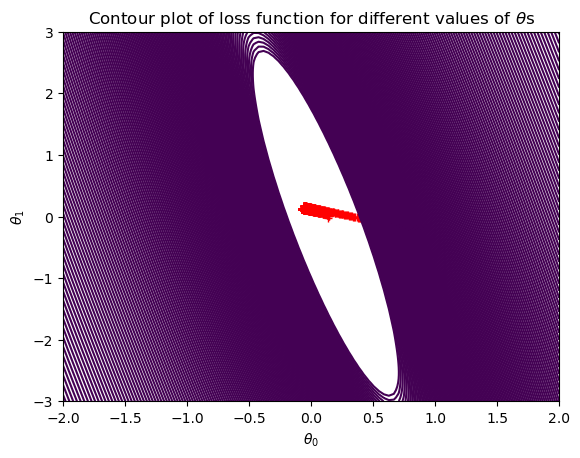

In [43]:
#This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)
plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');
plt.show()

## 05. Mean Temperature of Heathrow in 2021

In [44]:
dfyear = df[df['date'].dt.year == 2021]
dfyear.head()

date  month  BASEL_temp_mean  BELGRADE_temp_mean  \
22281 2021-01-01      1        -1.112591           -0.653703   
22282 2021-01-02      1        -1.221236           -0.551561   
22283 2021-01-03      1        -1.384204           -0.415371   
22284 2021-01-04      1        -1.329882           -0.517514   
22285 2021-01-05      1        -1.384204           -0.699100   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
22281           -0.005167         -1.111156             -1.239786   
22282           -0.005167         -1.016223             -1.195607   
22283           -0.005167         -1.063690             -1.136700   
22284           -0.005167         -1.142801             -1.269240   
22285           -0.005167         -1.126979             -1.239786   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
22281         -1.272886           -1.713826         -0.005705   
22282         -1.081061           -1.504171         -0.005705   
22283         -1.042696           -1.381872         -0.005705   
22284         -0.940389           -1.259573         -0.005705   
22285         -0.799717           -1.399343         -0.005705   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
22281            -0.995445             -1.222313         -1.473528   
22282            -0.741156             -1.282325         -1.716151   
22283            -0.862246             -1.207310         -1.608319   
22284            -0.886464             -1.297328         -1.648756   
22285            -0.874355             -1.267322         -1.810505   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
22281           -1.107756       -0.744778       -0.000746   
22282           -1.271132       -0.671969       -0.000746   
22283           -1.208295       -0.951071       -0.000746   
22284           -1.245997       -1.145228       -0.000746   
22285           -1.296267       -1.582083       -0.000746   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
22281            -1.206588            -0.540359        -1.496644   
22282            -0.884835            -0.702087        -1.763333   
22283            -1.016461            -0.938458        -1.465269   
22284            -1.191962            -0.863814        -1.575082   
22285            -1.382089            -0.975779        -1.496644   

       VALENTIA_temp_mean  
22281           -0.007287  
22282           -0.007287  
22283           -0.007287  
22284           -0.007287  
22285           -0.007287

index is already set with respect to 365 days. So, we will not initiate index again.

In [45]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.
X=index.to_numpy().reshape(n_rows,1)
#Represent intercept as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['HEATHROW_temp_mean'].to_numpy().reshape(n_rows,1)

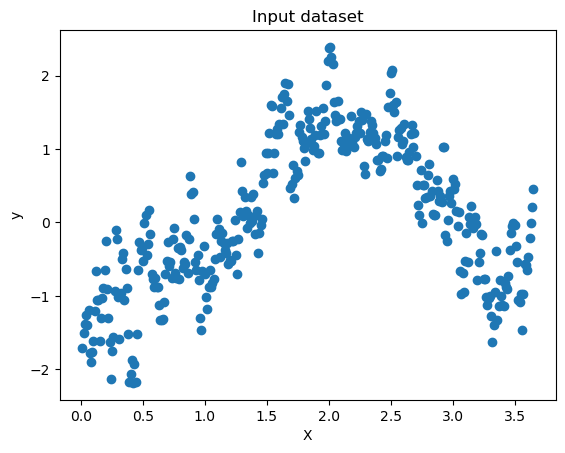

In [46]:
# Temperature data over time
plt.scatter(x=index['index'], y=dfyear['HEATHROW_temp_mean']) 
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

#### Running Gradient Descent for the Data Points

In [47]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'

num_iterations=200 
theta_init=np.array([[-1],[1]]) #<---Putting initial guess for [theta0], [theta1].
alpha=0.1 #<---Deciding step size.

theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 98.8 ms, sys: 2.58 ms, total: 101 ms
Wall time: 101 ms


In [48]:
theta

array([[-0.50716418],
       [ 0.32253388]])

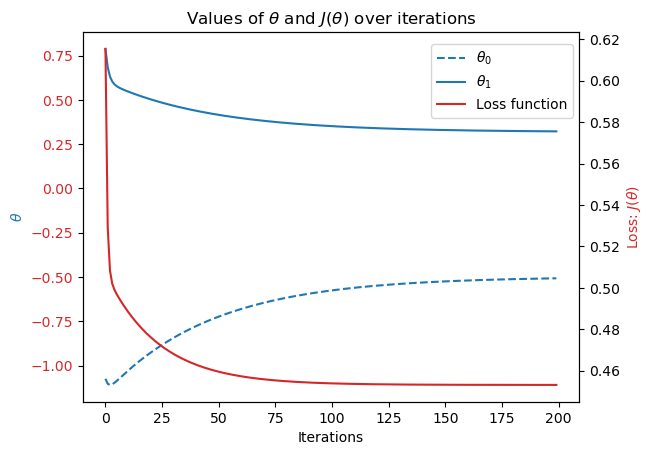

In [49]:
#This will plot your loss, theta0, and theta1.
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()
# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend(loc='upper center', bbox_to_anchor=(0.78, 0.87));
plt.show()

In [50]:
%%time
# theta range
theta0_vals = np.linspace(-1,-0.25,100) 
theta1_vals = np.linspace(0.0,0.50,100) 
                                      
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 1.14 s, sys: 15.1 ms, total: 1.15 s
Wall time: 1.15 s


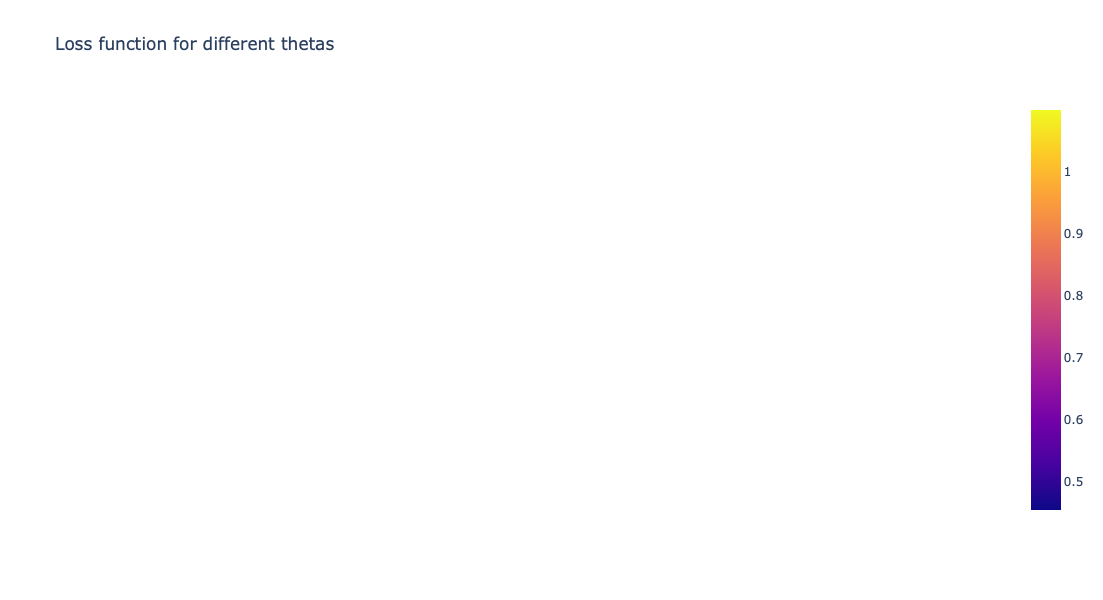

In [51]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss

fig = go.Figure(data=[go.Surface(x=theta0_vals, y=theta1_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

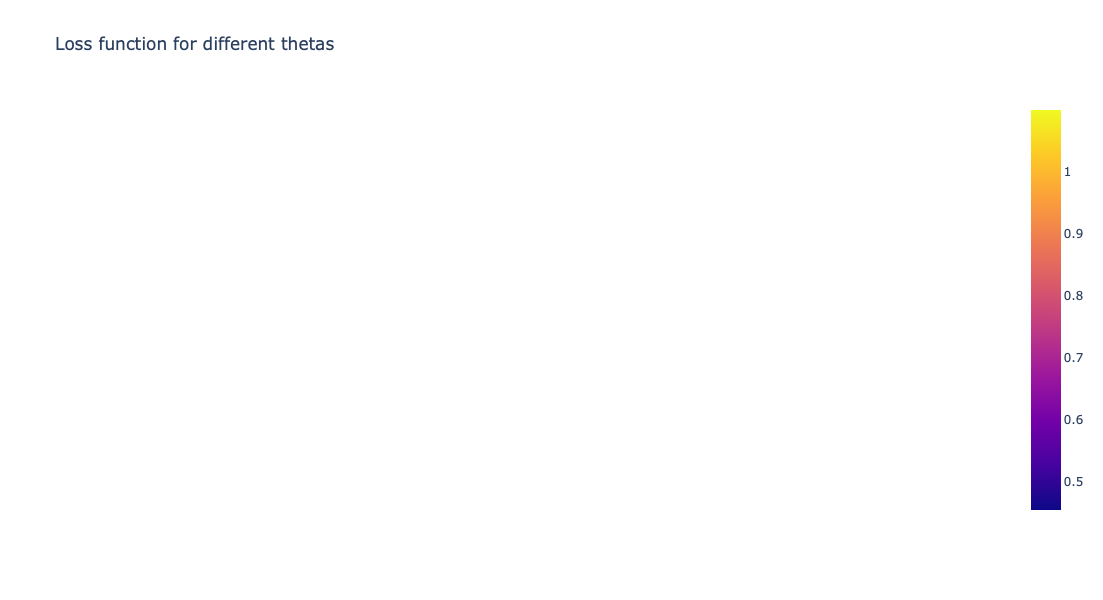

In [52]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.
#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Finding where it is closest to 0 in X and Y.


line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta0_vals, y=theta1_vals, z=J_vals)
fig.add_scatter3d(x=theta0_history, y=theta1_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

The loss function is closest to zero when **theta0 = -0.50716** and **theta1 = 0.32253.**

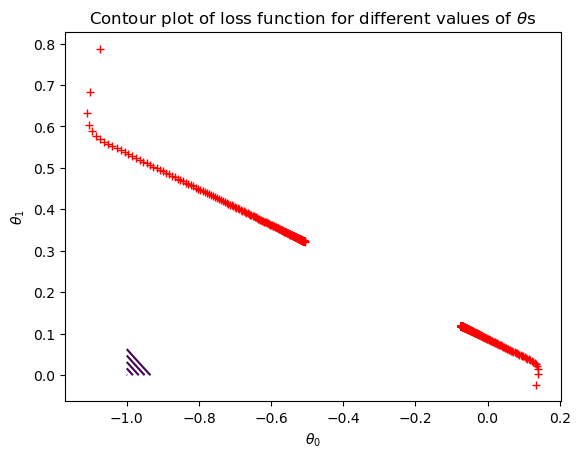

In [53]:
#This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)
plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');
plt.show()

#### How well does gradient descent converge? How much do you need to adjust between different weather stations and years?

For the given stations and years, the same step-size of 0.1 works. Madrid required 500 iterations whereas Budapest and Heathrow required 200 iterations. I would say that the gradient descent converges quickly. It really depends on the initial guess of theta0 and theta1. If they are close to the actual values of theta0 and theat1, it is likely that they will converge faster.

## 6. Temperature over 60 years

In [54]:
df['year'] = df['date'].dt.year

In [55]:
df_yr = df.drop(columns = ['date','month'])

In [56]:
df_plot = df_yr.groupby('year').mean()[['MADRID_temp_mean','HEATHROW_temp_mean','BUDAPEST_temp_mean']]

In [57]:
df_plot

MADRID_temp_mean  HEATHROW_temp_mean  BUDAPEST_temp_mean
year                                                          
1960         -0.130480           -0.103366           -0.063919
1961          0.022836           -0.038499            0.015911
1962         -0.079236           -0.316699           -0.142106
1963         -0.150952           -0.323256           -0.156512
1964         -0.029092           -0.133487           -0.144592
...                ...                 ...                 ...
2018          0.085837            0.230607            0.249825
2019          0.163277            0.172018            0.269420
2020          0.145252            0.241620            0.172345
2021          0.089456            0.085045           -0.005167
2022          0.462274            0.475543           -0.005167

[63 rows x 3 columns]

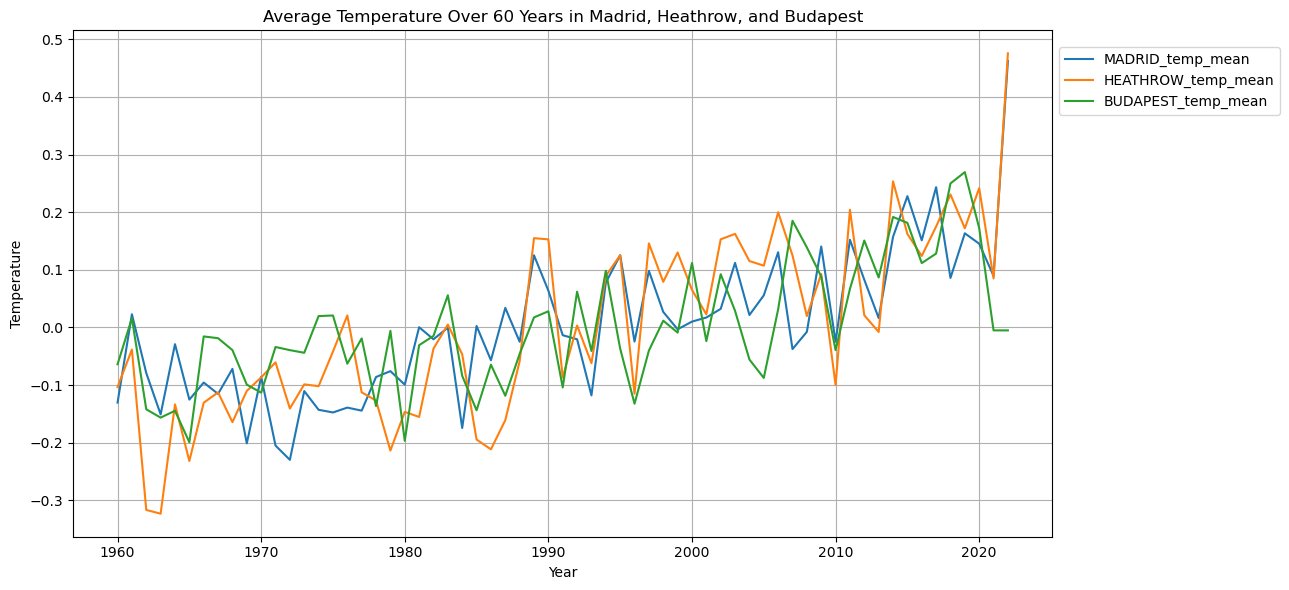

In [58]:
# Plotting
plt.figure(figsize=(13, 6))

# Plot each series
for column in df_plot.columns:
    plt.plot(df_plot.index, df_plot[column], label=column)

# Adding titles and labels
plt.title('Average Temperature Over 60 Years in Madrid, Heathrow, and Budapest')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, .9))
plt.tight_layout()
plt.show()


### Observations

1. The temperature in all three stations has **increased** over the span of 63 years.
2. From the graph it seems that Heathrow has **more variability** in temperature than Madrid and Budapest. Moreover, **Heathrow** has seen more extreme temperature in 1962-1963. 
3. It seems that standardized temperature remained between -0.2 and 0.0 upto 1980. But then, during late 1980s and post 1980 the standardized temperature remains above 0.0 more frequently.
4. After 2014 the standardized temperature  remained more in the range of 0.1 and 0.2.
5. In 2022, there is a massive spike in the temperature for Heathrow. It might be due to the case that 2022 data doesn't include November and December months which are relatively colder.